In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNIa_PrePeak_Mean', 'Fast Microlensing_Mean', 'Slow Microlensing_Mean',
       'KN_PrePeak_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Mean', 'TDEsPopMetric__some_color_pu_Mean',
       'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median',
       'Nstars_no_crowding_Total N Stars, no crowding',
       'ExgalM5_with_cuts_3x2ptFoM', 'DD:ELAISS1,u', 'DD:XMM-LSS,u',
       'DD:ECDFS,u', 'DD:COSMOS,u', 'DD:EDFS,u', 'DD:EDFSa,u', 'DD:EDFSb,u',
       'DD:ELAISS1,g', 'DD:XMM-LSS,g', 'DD:ECDFS,g', 'DD:COSMOS,g',
       'DD:EDFS,g', 'DD:EDFSa,g', 'DD:EDFSb,g', 'DD:ELAISS1,r', 'DD:XMM-LSS,r',
       'DD:ECDFS,r', 'DD:COSMOS,r', 'DD:EDFS,r', 'DD:EDFSa,r', 'DD:EDFSb,r',
       'DD:ELAISS1,i', 'DD:XMM-LSS,i', 'D

In [4]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNIa_PrePeak_Mean',
        'TDEsPopMetric__some_color_pu_Mean',
        'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        'Fast Microlensing_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding']#,
#        '3 pairs in 15 nights detection loss NEO H=16.0',
#        '3 pairs in 30 nights detection loss NEO H=22.0',
#       '3 pairs in 15 nights detection loss TNO H=4.0']

linear_cols = []#['SNIa_PrePeak_Mean',
           #'TDEsPopMetric__some_color_pu_Mean',
           #'Fast Microlensing_Mean',
           #'3 pairs in 15 nights detection loss NEO H=16.0',
           #'3 pairs in 30 nights detection loss NEO H=22.0',
           #'3 pairs in 15 nights detection loss TNO H=4.0']

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNIa_PrePeak_Mean': 'SNeIa', 'Fast Microlensing_Mean': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Mean': 'TDE',
               'TDEsPopMetric__some_color_pu_Mean':'TDE',
               'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=4.0':' TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [5]:
data['runName']


0             footprint_var_1
1             footprint_var_0
2                   twi_pairs
3             footprint_var_3
4      cadence_drive_gl30_gcb
5             footprint_var_2
6             footprint_var_4
7             footprint_var_5
8             footprint_var_6
9             footprint_var_7
10            footprint_var_8
11            footprint_var_9
12     twi_pairs_mixed_repeat
13        cadence_drive_gl100
14    cadence_drive_gl200_gcb
15            twi_pairs_mixed
16        cadence_drive_gl200
17           footprint_var_10
18           footprint_var_11
19         cadence_drive_gl30
20           twi_pairs_repeat
21             baseline_nexp1
22    cadence_drive_gl100_gcb
Name: runName, dtype: object

In [55]:
runs = ['baseline_nexp1'] + [name for name in data['runName'].values[0:17] if 'cadence' in name]

In [60]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='baseline_nexp1')
data_normed = data_normed.rename(columns=name_mapper)

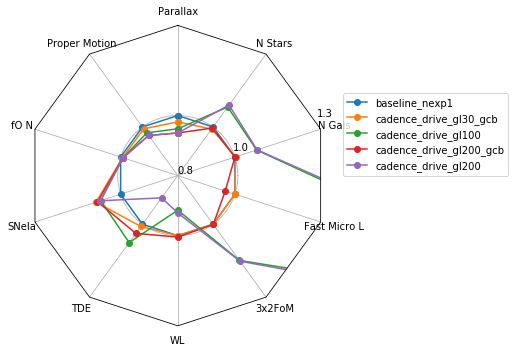

In [61]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.3])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')

In [62]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars
21,baseline_nexp1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,cadence_drive_gl30_gcb,0.978813,0.992604,0.993763,1.086039,1.009434,1.000000,1.000531,1.000000,1.002039,0.991647
13,cadence_drive_gl100,0.955805,0.975957,0.991684,1.069805,1.075472,0.915094,1.149042,2.392496,1.075916,1.082255
14,cadence_drive_gl200_gcb,0.942022,0.965111,0.991684,1.081169,1.037736,1.004717,1.000880,0.966051,0.999847,0.995482
16,cadence_drive_gl200,0.942022,0.965111,0.991684,1.071429,0.891509,0.924528,1.152229,2.628946,1.077360,1.090365


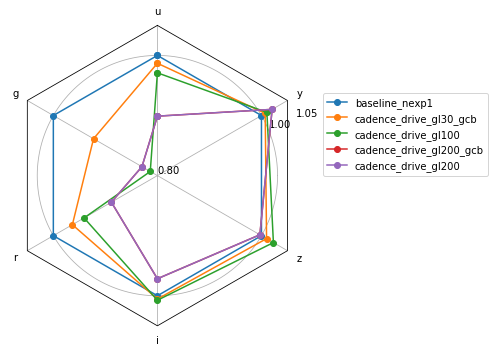

In [58]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp1',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.05], alpha=.1)
fig.tight_layout()

In [59]:
data_normed

,runName,u,g,r,i,z,y
21,baseline_nexp1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,cadence_drive_gl30_gcb,0.986984,0.922744,0.963428,1.005445,1.009804,1.007189
13,cadence_drive_gl100,0.971083,0.813721,0.940943,1.007479,1.022961,1.010442
14,cadence_drive_gl200_gcb,0.898948,0.829695,0.888443,0.971693,0.996961,1.020483
16,cadence_drive_gl200,0.898948,0.829695,0.888443,0.971693,0.996961,1.020483


In [27]:
runs = ['baseline_nexp1_'] + [name for name in data['runName'].values if 'footprint' in name] 

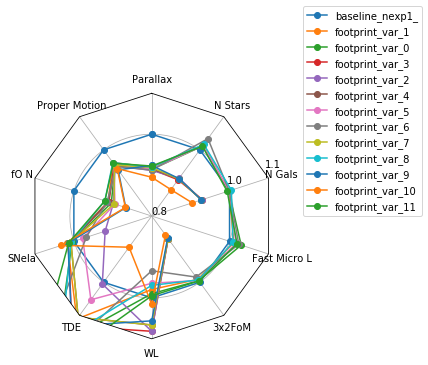

In [31]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='baseline_nexp1_')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.1])
fig.tight_layout()

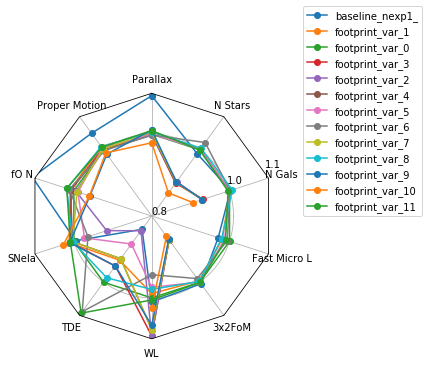

In [32]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='footprint_var_0')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.1])
fig.tight_layout()

In [37]:
runs = ['baseline_nexp1_'] + [name for name in data['runName'].values if 'twi' in name] 
runs

['baseline_nexp1_',
 'twi_pairs',
 'twi_pairs_mixed_repeat',
 'twi_pairs_mixed',
 'twi_pairs_repeat']

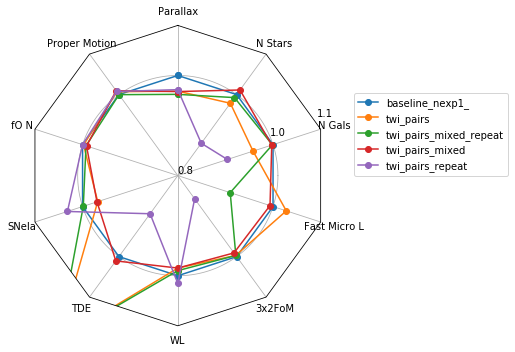

In [38]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='baseline_nexp1_')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.1])
fig.tight_layout()

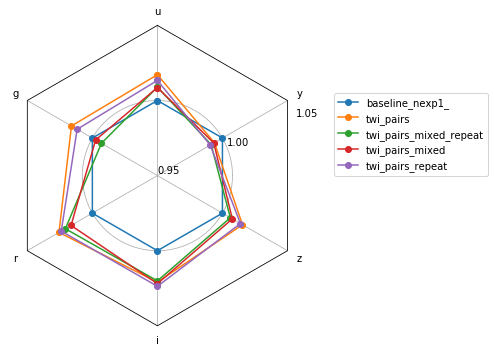

In [42]:

data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp1_',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.95, 1.0, 1.05])
fig.tight_layout()
#fig.savefig('radar_plots/var_exp_mags_radar.pdf')

In [9]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols, invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

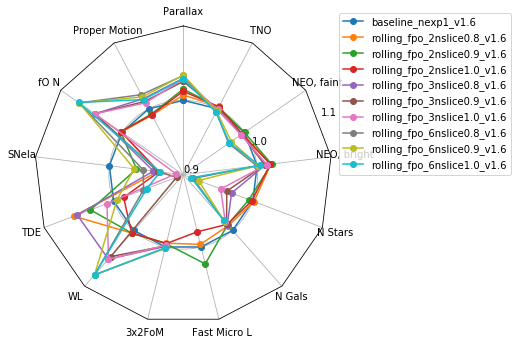

In [10]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.90, 1.0, 1.1], figsize=(8,5))
fig.tight_layout()
fig.savefig('radar_plots/rolling_radar.pdf')

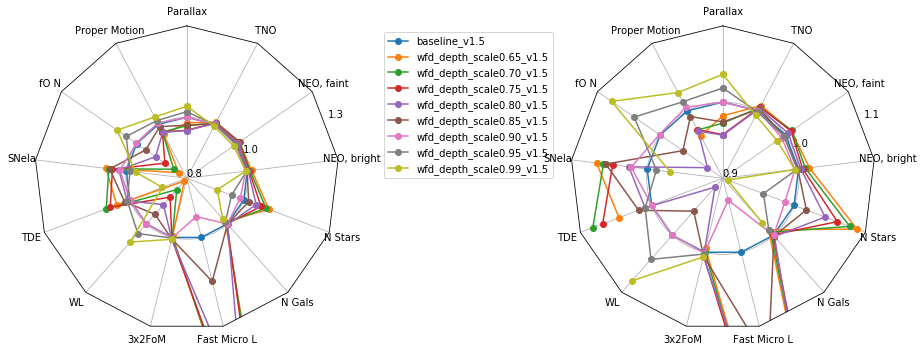

In [11]:
runs = ['baseline_v1.5', 'wfd_depth_scale0.65_v1.5',
 'wfd_depth_scale0.70_v1.5',
 'wfd_depth_scale0.75_v1.5',
 'wfd_depth_scale0.80_v1.5',
 'wfd_depth_scale0.85_v1.5',
 'wfd_depth_scale0.90_v1.5',
 'wfd_depth_scale0.95_v1.5',
 'wfd_depth_scale0.99_v1.5']
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True, rgrids=[[0.8, 1.0, 1.3], [0.9, 1.0, 1.1]])
fig.tight_layout()
fig.savefig('radar_plots/wfd_depth_radar.pdf')

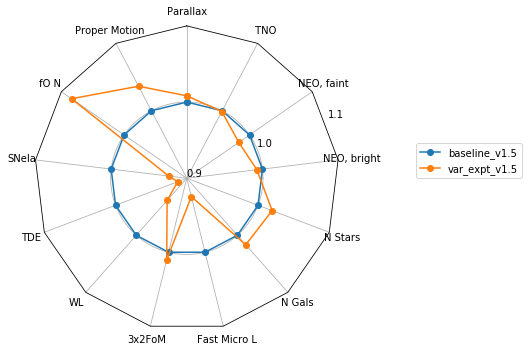

In [12]:
runs = ['baseline_v1.5', 'var_expt_v1.5']
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/var_exp_radar.pdf')

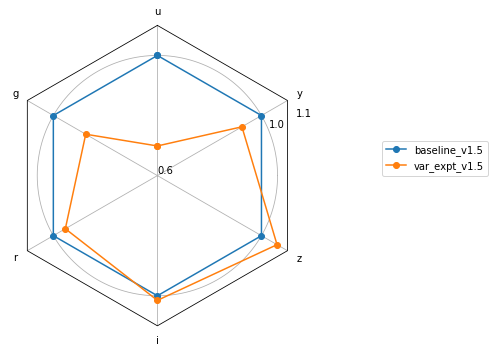

In [15]:
runs = ['baseline_v1.5', 'var_expt_v1.5']
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_v1.5',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.60, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/var_exp_mags_radar.pdf')

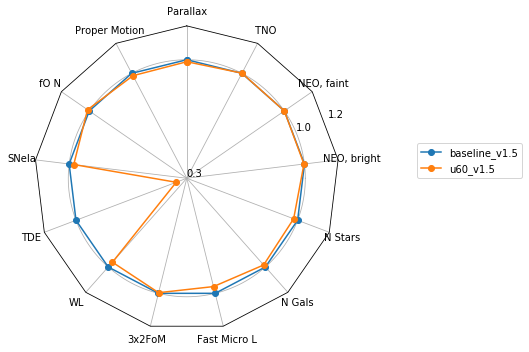

In [16]:
runs = ['baseline_v1.5', 'u60_v1.5']
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.3, 1.0, 1.2])
fig.tight_layout()
fig.savefig('radar_plots/u60_radar.pdf')

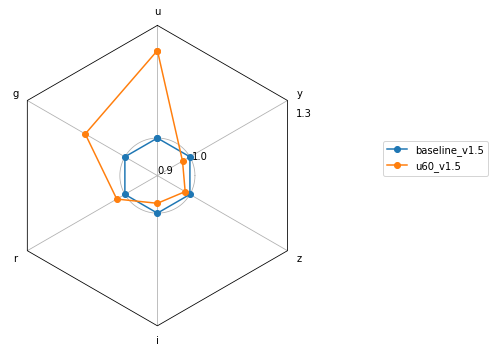

In [17]:

runs = ['baseline_v1.5', 'u60_v1.5']
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_v1.5',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.90, 1.0, 1.3])
fig.tight_layout()
fig.savefig('radar_plots/u60_mags_radar.pdf')

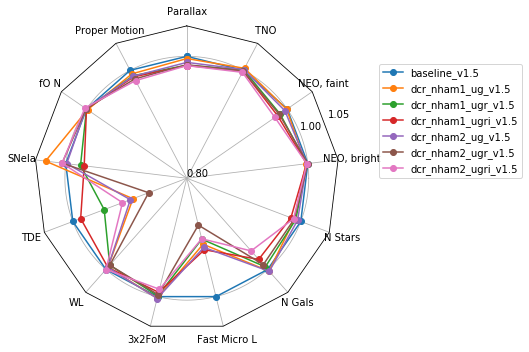

In [18]:
runs = ['baseline_v1.5', 'dcr_nham1_ug_v1.5',
 'dcr_nham1_ugr_v1.5',
 'dcr_nham1_ugri_v1.5',
 'dcr_nham2_ug_v1.5',
 'dcr_nham2_ugr_v1.5',
 'dcr_nham2_ugri_v1.5']
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.05])
fig.tight_layout()
fig.savefig('radar_plots/dcr_radar.pdf')

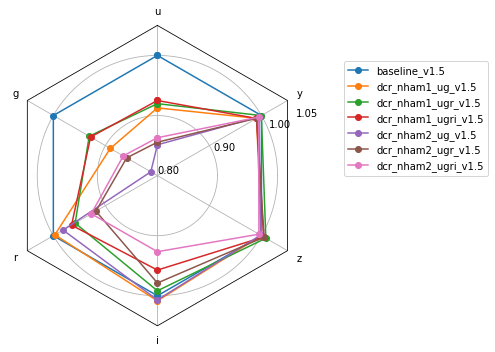

In [19]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_v1.5',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.80, 0.9, 1.0, 1.05])
fig.tight_layout()
fig.savefig('radar_plots/dcr_mags_radar.pdf')

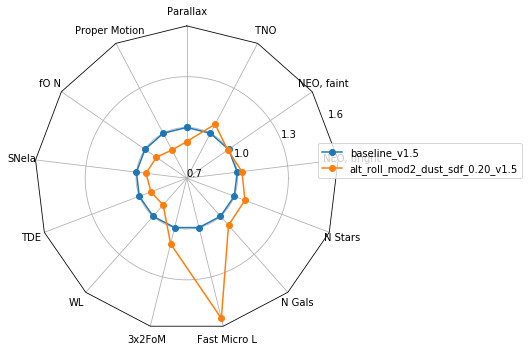

In [20]:
runs = ['baseline_v1.5', 'alt_roll_mod2_dust_sdf_0.20_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True)
fig.tight_layout()
fig.savefig('radar_plots/alt_dust_radar.pdf')

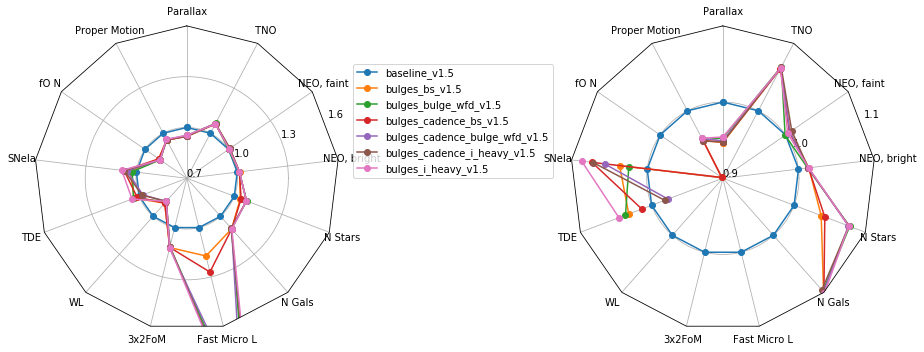

In [21]:
runs = ['baseline_v1.5', 'bulges_bs_v1.5',
 'bulges_bulge_wfd_v1.5',
 'bulges_cadence_bs_v1.5',
 'bulges_cadence_bulge_wfd_v1.5',
 'bulges_cadence_i_heavy_v1.5',
 'bulges_i_heavy_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True)
fig.tight_layout()
fig.savefig('radar_plots/bulge_radar.pdf')

## Let's try making some DDF plots

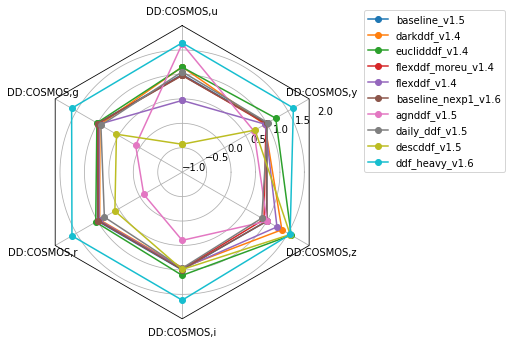

In [22]:
runs = ['baseline_v1.5', 
 'darkddf_v1.4',
 'euclidddf_v1.4',
 'flexddf_moreu_v1.4',
 'flexddf_v1.4', 'baseline_nexp1_v1.6',
 'agnddf_v1.5',
 'daily_ddf_v1.5',
 'descddf_v1.5','ddf_heavy_v1.6']
ddf_cols = ['runName', 'DD:COSMOS,u',
 'DD:COSMOS,g',
 'DD:COSMOS,r',
 'DD:COSMOS,i',
 'DD:COSMOS,z',
 'DD:COSMOS,y']
data_normed = norm_df(data, runs, ddf_cols, norm_run='baseline_v1.5', mag_cols='all')
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[-1, -0.5, 0, 0.5, 1., 1.5, 2.])
fig.tight_layout()
fig.savefig('radar_plots/ddf1_radar.pdf')

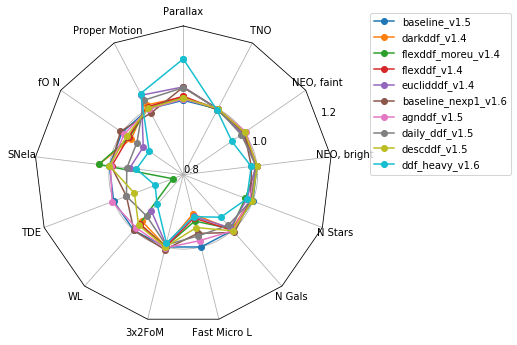

In [23]:
runs = ['baseline_v1.5', 
 'darkddf_v1.4','flexddf_moreu_v1.4',
 'flexddf_v1.4',
 'euclidddf_v1.4',
 'baseline_nexp1_v1.6',
 'agnddf_v1.5',
 'daily_ddf_v1.5',
 'descddf_v1.5','ddf_heavy_v1.6']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5')
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.8,1., 1.2])
fig.tight_layout()
fig.savefig('radar_plots/ddf2_radar.pdf')

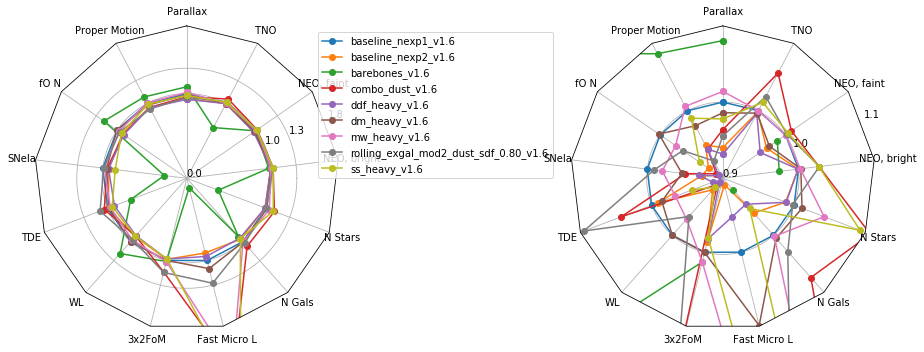

In [24]:
runs = ['baseline_nexp1_v1.6',
        'baseline_nexp2_v1.6',
        'barebones_v1.6',
 'combo_dust_v1.6',
 'ddf_heavy_v1.6',
 'dm_heavy_v1.6',
 'mw_heavy_v1.6',
 'rolling_exgal_mod2_dust_sdf_0.80_v1.6',
 'ss_heavy_v1.6']

data_normed = norm_df(data, runs, cols, norm_run='baseline_nexp1_v1.6',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True, rgrids=[[0., 1.0, 1.3, 1.8], [0.9, 1.0, 1.1]])
fig.tight_layout()
fig.savefig('radar_plots/v16_radar.pdf')

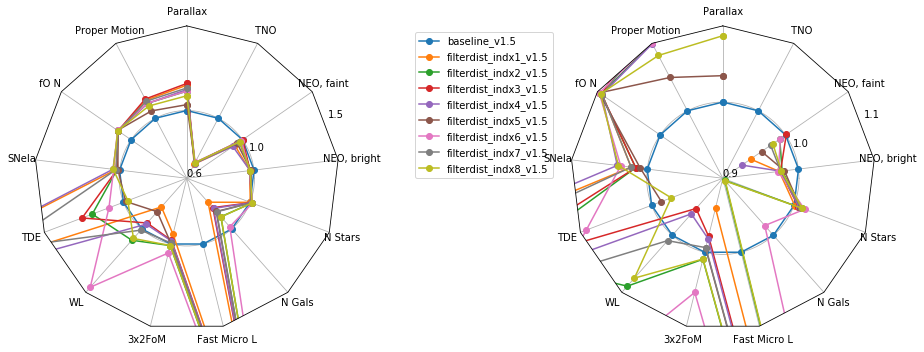

In [25]:
runs = ['baseline_v1.5', 'filterdist_indx1_v1.5',
 'filterdist_indx2_v1.5',
 'filterdist_indx3_v1.5',
 'filterdist_indx4_v1.5',
 'filterdist_indx5_v1.5',
 'filterdist_indx6_v1.5',
 'filterdist_indx7_v1.5',
 'filterdist_indx8_v1.5'
 ]

data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True, rgrids=[[0.6, 1.0, 1.5],[0.9,1.0,1.1]])
fig.tight_layout()
fig.savefig('radar_plots/filter_dist_radar.pdf')

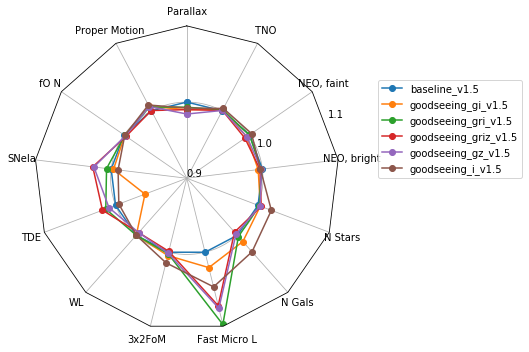

In [26]:
runs = ['baseline_v1.5', 
 'goodseeing_gi_v1.5',
 'goodseeing_gri_v1.5',
 'goodseeing_griz_v1.5',
 'goodseeing_gz_v1.5',
 'goodseeing_i_v1.5']

data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/goodseeing_radar.pdf')

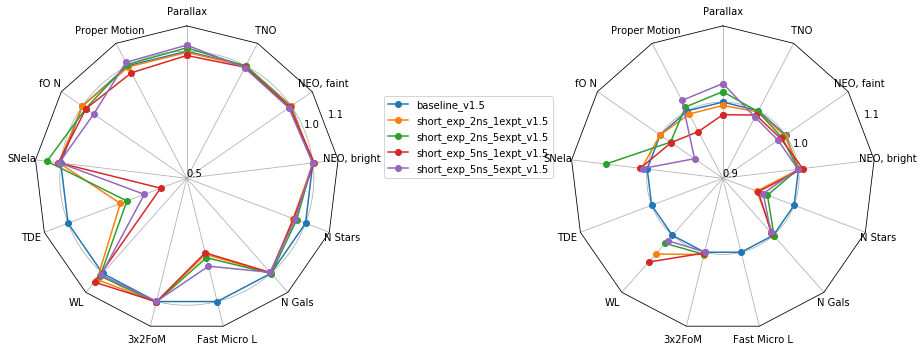

In [27]:
runs = ['baseline_v1.5', 
 'short_exp_2ns_1expt_v1.5',
 'short_exp_2ns_5expt_v1.5',
 'short_exp_5ns_1expt_v1.5',
 'short_exp_5ns_5expt_v1.5']

data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True, rgrids=[[0.5, 1.0, 1.1],[0.9, 1, 1.1]])
fig.tight_layout()
fig.savefig('radar_plots/shortexp_radar.pdf')

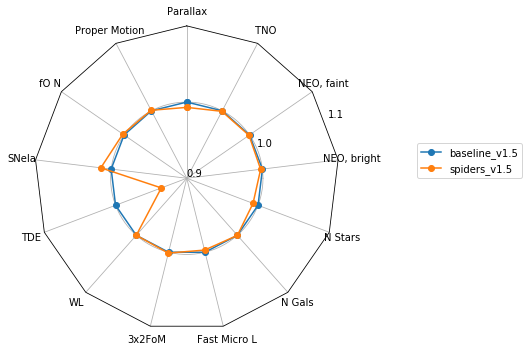

In [28]:
runs = ['baseline_v1.5', 
 'spiders_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/spider_radar.pdf')

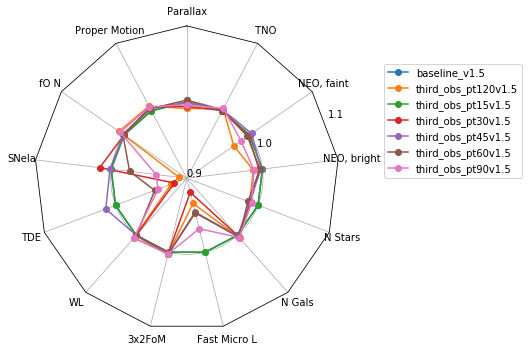

In [29]:
runs = ['baseline_v1.5', 
 'third_obs_pt120v1.5',
 'third_obs_pt15v1.5',
 'third_obs_pt30v1.5',
 'third_obs_pt45v1.5',
 'third_obs_pt60v1.5',
 'third_obs_pt90v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/third_radar.pdf')

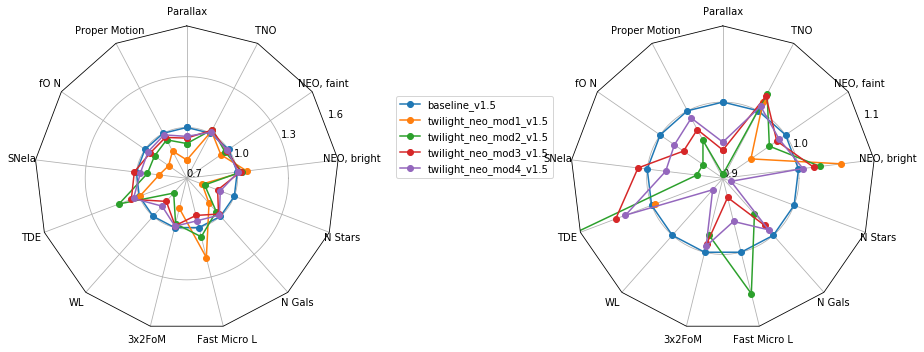

In [30]:
runs = ['baseline_v1.5', 
 'twilight_neo_mod1_v1.5',
 'twilight_neo_mod2_v1.5',
 'twilight_neo_mod3_v1.5',
 'twilight_neo_mod4_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True)
fig.tight_layout()
fig.savefig('radar_plots/twineo_radar.pdf')

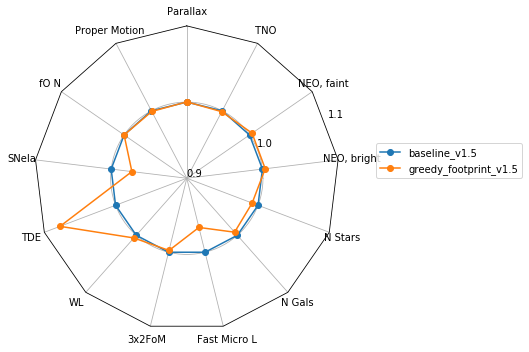

In [31]:
runs = ['baseline_v1.5', 
 'greedy_footprint_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/greedy_radar.pdf')

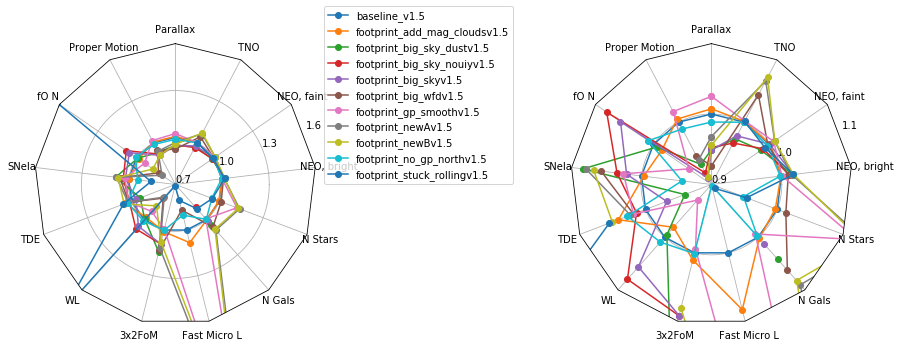

In [32]:
runs = ['baseline_v1.5', 'footprint_add_mag_cloudsv1.5',
 'footprint_big_sky_dustv1.5',
 'footprint_big_sky_nouiyv1.5',
 'footprint_big_skyv1.5',
 'footprint_big_wfdv1.5',
 'footprint_gp_smoothv1.5',
 'footprint_newAv1.5',
 'footprint_newBv1.5',
 'footprint_no_gp_northv1.5',
 'footprint_stuck_rollingv1.5',
 ]
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True)
fig.tight_layout()
fig.savefig('radar_plots/footprints_radar.pdf')

/Users/lynnej/anaconda3/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)
/Users/lynnej/anaconda3/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


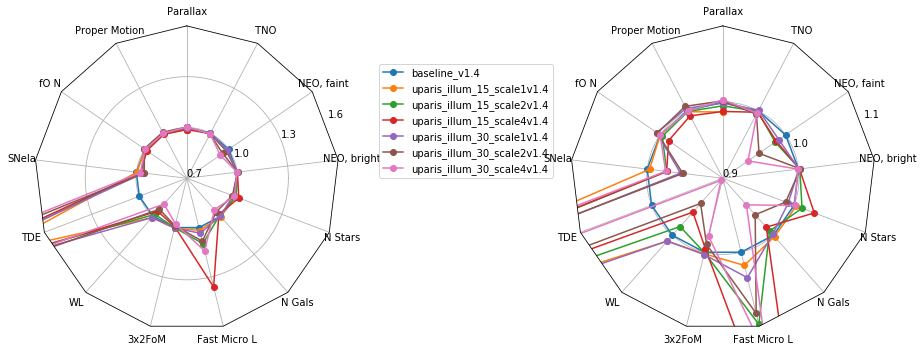

In [33]:
runs = ['baseline_v1.4', 'uparis_illum_15_scale1v1.4',
 'uparis_illum_15_scale2v1.4',
 'uparis_illum_15_scale4v1.4',
 'uparis_illum_30_scale1v1.4',
 'uparis_illum_30_scale2v1.4',
 'uparis_illum_30_scale4v1.4',
 ]
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.4',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True)
fig.tight_layout()
fig.savefig('radar_plots/upairs30_radar.pdf')

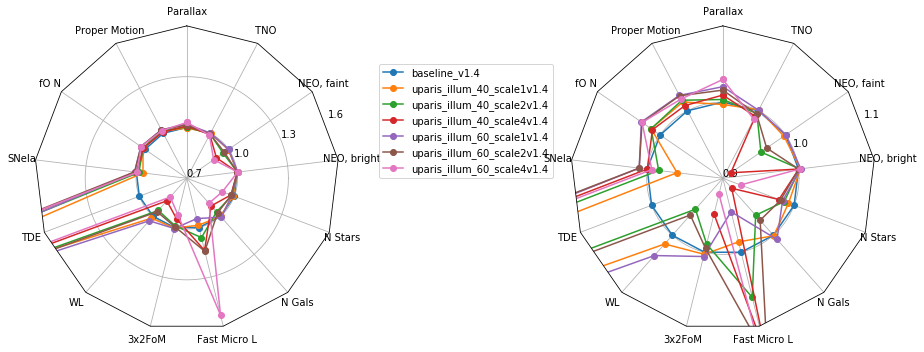

In [34]:
runs = ['baseline_v1.4', 
 'uparis_illum_40_scale1v1.4',
 'uparis_illum_40_scale2v1.4',
 'uparis_illum_40_scale4v1.4',
 'uparis_illum_60_scale1v1.4',
 'uparis_illum_60_scale2v1.4',
 'uparis_illum_60_scale4v1.4'
 ]
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.4',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True)
fig.tight_layout()
fig.savefig('radar_plots/upairs60_radar.pdf')

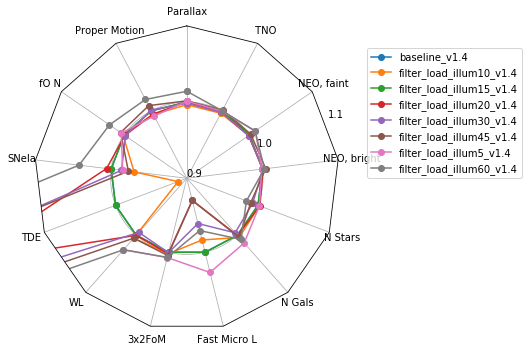

In [35]:
runs = ['baseline_v1.4', 
 'filter_load_illum10_v1.4',
 'filter_load_illum15_v1.4',
 'filter_load_illum20_v1.4',
 'filter_load_illum30_v1.4',
 'filter_load_illum45_v1.4',
 'filter_load_illum5_v1.4',
 'filter_load_illum60_v1.4'
 ]
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.4',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/filter_load_radar.pdf')

In [36]:
[name for name in data['runName'] if 'filt' in name]

['filter_load_illum10_v1.4',
 'filter_load_illum15_v1.4',
 'filter_load_illum20_v1.4',
 'filter_load_illum30_v1.4',
 'filter_load_illum45_v1.4',
 'filter_load_illum5_v1.4',
 'filter_load_illum60_v1.4',
 'twi_filters_1_v1.4',
 'twi_filters_2_v1.4',
 'twi_filters_3_v1.4',
 'twi_filters_4_v1.4',
 'twi_filters_5_v1.4',
 'baseline_samefilt_v1.5',
 'filterdist_indx1_v1.5',
 'filterdist_indx2_v1.5',
 'filterdist_indx3_v1.5',
 'filterdist_indx4_v1.5',
 'filterdist_indx5_v1.5',
 'filterdist_indx6_v1.5',
 'filterdist_indx7_v1.5',
 'filterdist_indx8_v1.5',
 'even_filters_alt_g_v1.6',
 'even_filters_altv1.6',
 'even_filters_g_v1.6',
 'even_filtersv1.6']